In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Amreli and MSP NRM data.csv")
df.columns

Index(['batch', 'Heat number (life number)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy (KWH)', 'Voltage', 'Frequency',
       'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Refractory lining'],
      dtype='object')

In [3]:

#Taking features and target
cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency','Rating of the furnace (KW)','Input (MT)','Input energy (KWH)','Tapping Temperature (C)','Efficiency (MT/KWH)','batch']
# cols = ['Total Heat Time (minutes)', 'Final C%', 'Voltage', 'Frequency','Input (MT)','Input energy (KWH)','Efficiency (MT/KWH)','batch']

dflr = df[cols]
X = dflr.iloc[:,:-2].values
X_train_ac, X_test_ac, y_train_ac, y_test_ac = train_test_split(X, dflr['Efficiency (MT/KWH)'].values, stratify = dflr['batch'].values, test_size = 0.30, random_state=40)


from sklearn import preprocessing
scaler1 = preprocessing.MinMaxScaler().fit(X_train_ac)
Train_scaled_in = scaler1.transform(X_train_ac)
Test_scaled_in = scaler1.transform(X_test_ac)

scaler2 = preprocessing.MinMaxScaler().fit(y_train_ac.reshape(-1,1))
Train_scaled_out = scaler2.transform(y_train_ac.reshape(-1,1))
Test_scaled_out = scaler2.transform(y_test_ac.reshape(-1,1))

X_train = Train_scaled_in
Y_train = Train_scaled_out
X_test = Test_scaled_in
Y_test = Test_scaled_out

In [4]:
X_train = Train_scaled_in
Y_train = Train_scaled_out
X_test = Test_scaled_in
Y_test = Test_scaled_out


# Uncomment section 5 for MLP model and comment section 6

In [5]:
## SKlearn MLP


# from sklearn.neural_network import MLPRegressor
# r = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu').fit(X_train, Y_train)
# pre_y1 = r.predict(X_train)
# val_y1 = r.predict(X_test)

# pre_y1_a = scaler2.inverse_transform(pre_y1.reshape(-1,1))
# val_y1_a = scaler2.inverse_transform(val_y1.reshape(-1,1))

In [7]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 100
n_hidden_2 = 500
n_hidden_3 = 250
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1   

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
# x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
# x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(X_train, Y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)

pre_y1 = model.predict(X_train)
val_y1 = model.predict(X_test)




Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               700       
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 101       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
70/70 - 0s - loss: 0.0237 - mse: 0.0237
Epoch 2/500
70/70 - 0s - loss: 0.0064 - mse: 0.0064
Epoch 3/500
70/70 - 0s - loss: 0.0053 - mse: 0.0053
Epoch 4/500
70/70 - 0s - loss: 0.0042 - mse: 0.0042
Epoch 5/500
70/70 - 0s - loss: 0.0035 - mse: 0.0035
Epoch 6/500
70/70 - 0s - loss: 0.0030 - mse: 0.0030
Epoch 7/500
70/70 - 0s - loss: 0.0024 - mse: 0.0024
Epoch 8/500
70/70 - 0s

Epoch 125/500
70/70 - 0s - loss: 9.0005e-05 - mse: 9.0005e-05
Epoch 126/500
70/70 - 0s - loss: 9.9217e-05 - mse: 9.9217e-05
Epoch 127/500
70/70 - 0s - loss: 1.0674e-04 - mse: 1.0674e-04
Epoch 128/500
70/70 - 0s - loss: 1.1434e-04 - mse: 1.1434e-04
Epoch 129/500
70/70 - 0s - loss: 8.4852e-05 - mse: 8.4852e-05
Epoch 130/500
70/70 - 0s - loss: 8.9612e-05 - mse: 8.9612e-05
Epoch 131/500
70/70 - 0s - loss: 9.9934e-05 - mse: 9.9934e-05
Epoch 132/500
70/70 - 0s - loss: 9.8065e-05 - mse: 9.8065e-05
Epoch 133/500
70/70 - 0s - loss: 1.2104e-04 - mse: 1.2104e-04
Epoch 134/500
70/70 - 0s - loss: 7.5128e-05 - mse: 7.5128e-05
Epoch 135/500
70/70 - 0s - loss: 7.5801e-05 - mse: 7.5801e-05
Epoch 136/500
70/70 - 0s - loss: 9.4375e-05 - mse: 9.4375e-05
Epoch 137/500
70/70 - 0s - loss: 1.3717e-04 - mse: 1.3717e-04
Epoch 138/500
70/70 - 0s - loss: 9.1585e-05 - mse: 9.1585e-05
Epoch 139/500
70/70 - 0s - loss: 8.0458e-05 - mse: 8.0458e-05
Epoch 140/500
70/70 - 0s - loss: 8.9777e-05 - mse: 8.9777e-05
Epoch 14

70/70 - 0s - loss: 6.2544e-05 - mse: 6.2544e-05
Epoch 258/500
70/70 - 0s - loss: 6.9452e-05 - mse: 6.9452e-05
Epoch 259/500
70/70 - 0s - loss: 6.9028e-05 - mse: 6.9028e-05
Epoch 260/500
70/70 - 0s - loss: 6.6710e-05 - mse: 6.6710e-05
Epoch 261/500
70/70 - 0s - loss: 7.7887e-05 - mse: 7.7887e-05
Epoch 262/500
70/70 - 0s - loss: 5.8629e-05 - mse: 5.8629e-05
Epoch 263/500
70/70 - 0s - loss: 6.3184e-05 - mse: 6.3184e-05
Epoch 264/500
70/70 - 0s - loss: 8.5850e-05 - mse: 8.5850e-05
Epoch 265/500
70/70 - 0s - loss: 8.2474e-05 - mse: 8.2474e-05
Epoch 266/500
70/70 - 0s - loss: 7.4158e-05 - mse: 7.4158e-05
Epoch 267/500
70/70 - 0s - loss: 7.6783e-05 - mse: 7.6783e-05
Epoch 268/500
70/70 - 0s - loss: 7.8823e-05 - mse: 7.8823e-05
Epoch 269/500
70/70 - 0s - loss: 8.3596e-05 - mse: 8.3596e-05
Epoch 270/500
70/70 - 0s - loss: 7.4907e-05 - mse: 7.4907e-05
Epoch 271/500
70/70 - 0s - loss: 6.9956e-05 - mse: 6.9956e-05
Epoch 272/500
70/70 - 0s - loss: 9.5627e-05 - mse: 9.5627e-05
Epoch 273/500
70/70 - 

Epoch 390/500
70/70 - 0s - loss: 9.6342e-05 - mse: 9.6342e-05
Epoch 391/500
70/70 - 0s - loss: 5.8633e-05 - mse: 5.8633e-05
Epoch 392/500
70/70 - 0s - loss: 6.0307e-05 - mse: 6.0307e-05
Epoch 393/500
70/70 - 0s - loss: 6.8558e-05 - mse: 6.8558e-05
Epoch 394/500
70/70 - 0s - loss: 5.9489e-05 - mse: 5.9489e-05
Epoch 395/500
70/70 - 0s - loss: 6.1359e-05 - mse: 6.1359e-05
Epoch 396/500
70/70 - 0s - loss: 6.7772e-05 - mse: 6.7772e-05
Epoch 397/500
70/70 - 0s - loss: 7.6447e-05 - mse: 7.6447e-05
Epoch 398/500
70/70 - 0s - loss: 6.5792e-05 - mse: 6.5792e-05
Epoch 399/500
70/70 - 0s - loss: 7.4612e-05 - mse: 7.4612e-05
Epoch 400/500
70/70 - 0s - loss: 7.9687e-05 - mse: 7.9687e-05
Epoch 401/500
70/70 - 0s - loss: 6.7303e-05 - mse: 6.7303e-05
Epoch 402/500
70/70 - 0s - loss: 8.6036e-05 - mse: 8.6036e-05
Epoch 403/500
70/70 - 0s - loss: 6.5429e-05 - mse: 6.5429e-05
Epoch 404/500
70/70 - 0s - loss: 6.7745e-05 - mse: 6.7745e-05
Epoch 405/500
70/70 - 0s - loss: 6.5182e-05 - mse: 6.5182e-05
Epoch 40

In [8]:

pre_y1_a = scaler2.inverse_transform(pre_y1)
val_y1_a = scaler2.inverse_transform(val_y1)
# pre_y1_a = pre_y1
# val_y1_a = val_y1
act_train = y_train_ac
act_test = y_test_ac
pred_train = pre_y1_a
pred_test = val_y1_a

In [9]:
b = np.sum(np.abs(act_test-pred_test))/np.sum(act_test)
a = np.sum(np.abs(act_train-pred_train))/np.sum(act_train)
print('Train',a)
print('Test',b)

 



Train 40.66897628851409
Test 15.098651979181007


In [10]:
a1 = np.sum(np.square(pred_train-act_train))/np.sum(np.square(act_train-np.mean(act_train)))*100
a2 = np.sum(np.square(pred_test-act_test))/np.sum(np.square(act_test-np.mean(act_test)))*100
print('NMSE train',a1)
print('NMSE test',a2)

NMSE train 68699.9585740204
NMSE test 28435.522734558333


In [11]:

mse_train = np.sum(np.square(pred_train-act_train))/pred_train.shape[0]
mse_test = np.sum(np.square(pred_test-act_test))/pred_test.shape[0]
print(mse_train)
print(mse_test)
rmse_train = np.sqrt(mse_train)*100
rmse_test = np.sqrt(mse_test)*100
print(rmse_train)
print(rmse_test)
nrmse1_train = rmse_train/np.sqrt(np.var(act_train))
nrmse1_test = rmse_test/np.sqrt(np.var(act_test))
print(nrmse1_train)
print(nrmse1_test)
nrmse2_train = rmse_train/np.mean(act_train)
nrmse2_test = rmse_test/np.mean(act_test)
print(nrmse2_train)
print(nrmse2_test)
nrmse3_train = rmse_train/(np.max(act_train)-np.min(act_train))
nrmse3_test = rmse_test/(np.max(act_test)-np.min(act_test))
print(nrmse3_train)
print(nrmse3_test)


4.930758021293459e-05
9.406397111820504e-06
0.7021935645741464
0.3066985019823296
2621.067694166261
1686.2835685186028
444.09651052462385
195.0446126364595
185.23893445065454
203.35399945785014


In [12]:
Q1_1 = np.percentile(act_train, 25, interpolation = 'midpoint') 
Q3_1 = np.percentile(act_test, 75, interpolation = 'midpoint') 
IQR1 = Q3_1 - Q1_1 
Q1_2 = np.percentile(act_train, 25, interpolation = 'midpoint') 
Q3_2 = np.percentile(act_test, 75, interpolation = 'midpoint') 
IQR2 = Q3_2 - Q1_2  

nrmse2_train = rmse_train/IQR1
nrmse2_test = rmse_test/IQR2
print(nrmse2_train)
print(nrmse2_test)

MSEref = np.mean(np.var(act_train))
x1 = mse_train/MSEref

MSEref = np.mean(np.var(act_test))
x2 = mse_test/MSEref

print(x1)
print(x2)

5897.713498632192
2575.956241137638
686.9995857402041
284.3552273455833


In [13]:
pred_test.shape


(149, 1)

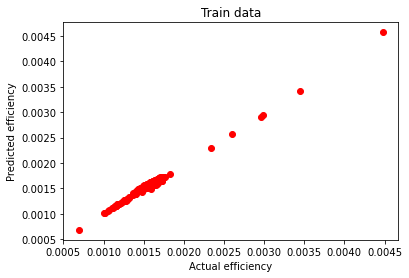

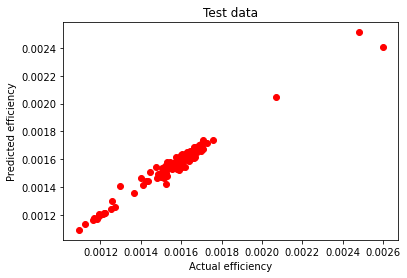

In [14]:
# plt.figure(figsize =(8, 5)) 

plt.figure()
plt.plot(act_train, pred_train, 'ro') 
# plt.plot(x, y, linewidth = 3.0, label ='fit') 
# plt.legend(loc ='best') 
plt.ylabel('Predicted efficiency') 
plt.xlabel('Actual efficiency') 
plt.title('Train data')

plt.show() 

plt.figure()

plt.plot(act_test, pred_test, 'ro') 
# plt.plot(x, y, linewidth = 3.0, label ='fit') 
# plt.legend(loc ='best') 
plt.ylabel('Predicted efficiency') 
plt.xlabel('Actual efficiency') 
plt.title('Test data')
plt.show() 